# Exploratory Analysis

---

## Univariada Temporal

- Distribuição de acidentes por ano
- Distribuição mensal e identificação de padrões sazonais
- Distribuição por dia da semana
- Distribuição por horário
- Distribuição por estação do ano

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")

# Importando funções do módulo próprio
from src.visualization import plot_bar_from_column

sns.set_theme()

Observação:

- A função ``plot_bar_from_column`` foi importada do módulo [visualization.py](../src/visualization.py)
- Localizado na pasta [src](../src/).

In [2]:
df = pd.read_csv("../data/processed/NYC_Collisions_Processed.csv")
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter


### Year (Ano)

In [3]:
round(df["Year"].value_counts(normalize=True)*100, 2)

Year
2021    46.45
2022    43.43
2023    10.12
Name: proportion, dtype: float64

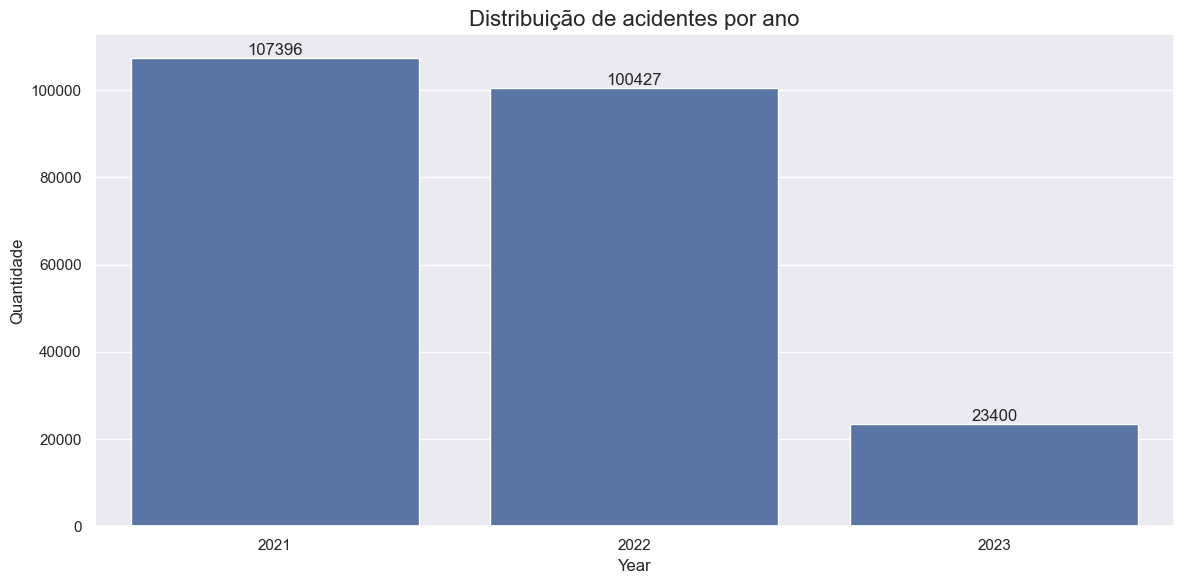

In [4]:
plot_bar_from_column(df=df, column="Year", title="Distribuição de acidentes por ano")

Este gráfico mostra quantos acidentes ocorreram em cada ano. Em 2021, foram 46.45% dos acidentes. Em 2022, o número caiu um pouco, para 43.43%. Já em 2023, o número registrado foi bem menor: 10.12%. Essa grande diferença em 2023 significa que os dados daquele ano ainda não estão completos, cobrindo apenas uma parte do período, e não necessariamente que os acidentes diminuíram tanto assim.

### Month (Mês)

In [5]:
round(df["Month Name"].value_counts(normalize=True)*100, 2)

Month Name
March        10.52
January       9.69
February      8.93
June          8.42
May           8.25
October       8.08
April         8.02
July          7.91
August        7.88
September     7.87
November      7.35
December      7.10
Name: proportion, dtype: float64

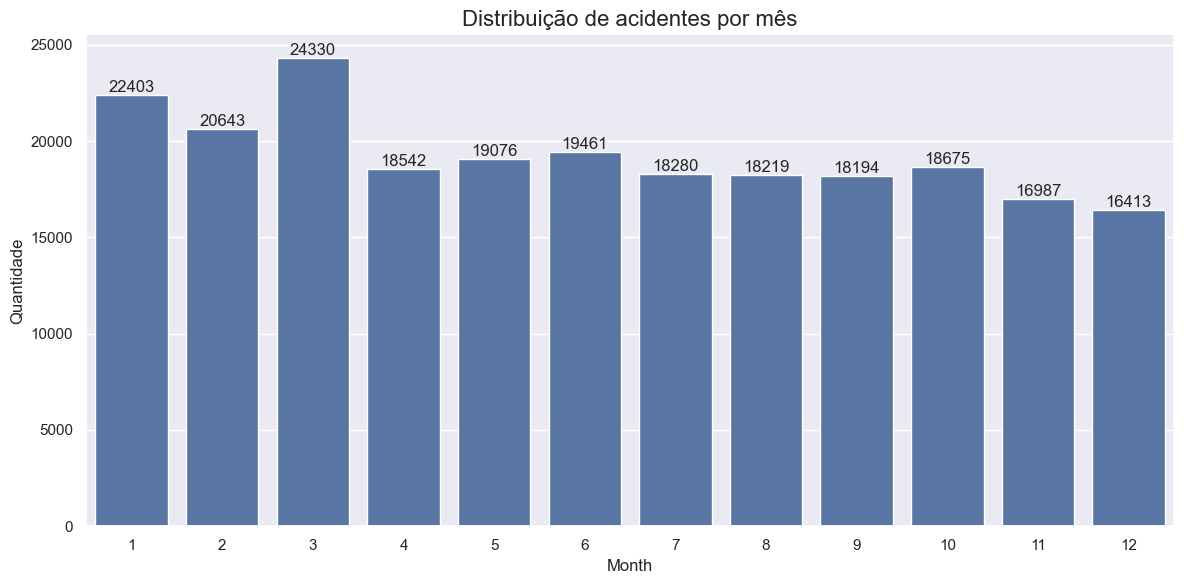

In [6]:
plot_bar_from_column(df=df, column="Month", title="Distribuição de acidentes por mês")

Este gráfico representa a quantidade de acidentes registradas em cada mês. Os primeiros meses apresentam os números mais altos, com o pico dos acidentes no mês de março com 10.52%, em seguida janeiro com 9.69% e fevereiro com 8.93%. 

Ao decorrer do ano, os acidentes se mantêm estáveis no mês de abril até outubro, com uma leve queda em novembro, 7.35%, e dezembro, 7.10%. Isso pode estar ligado com as estações, a mudança de inverno para primavera.

### Day of Week (Dia da Semana)

In [7]:
round(df["Day of week"].value_counts(normalize=True)*100, 2)

Day of week
Friday       15.71
Thursday     14.53
Saturday     14.28
Wednesday    14.26
Tuesday      14.12
Monday       14.01
Sunday       13.09
Name: proportion, dtype: float64

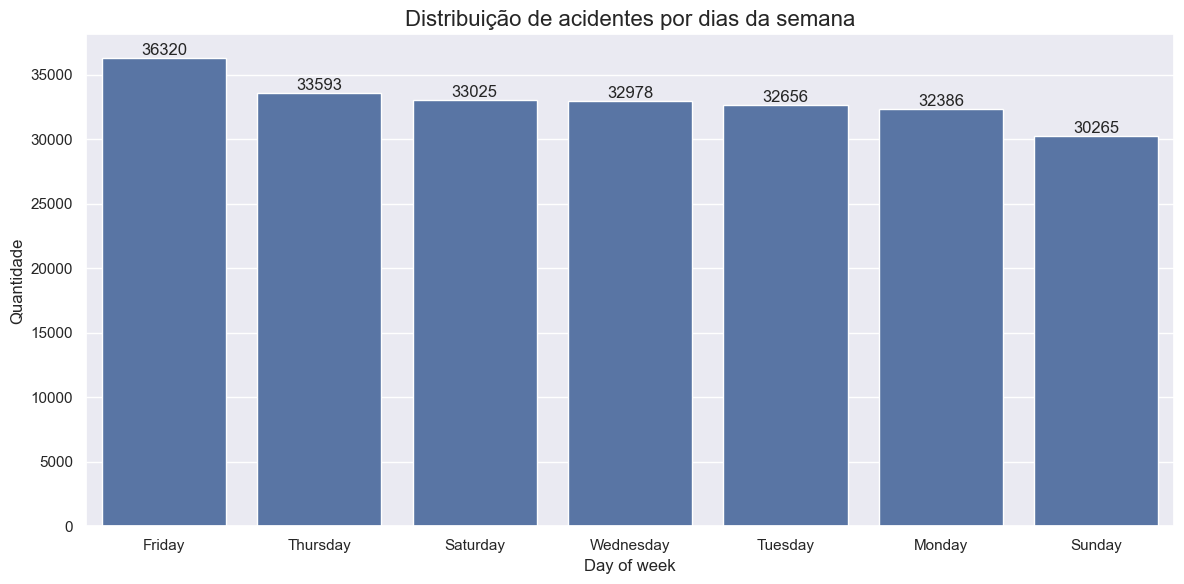

In [8]:
plot_bar_from_column(df=df, column="Day of week", title="Distribuição de acidentes por dias da semana")

Este gráfico apresenta a distribuição de acidentes em cada dia da semana. A sexta-feira registrou a maior proporção, com 15,71% dos acidentes, seguida pela quinta-feira (14,53%) e pelo sábado (14,28%). Os demais dias tiveram valores próximos, variando entre 14,01% (segunda-feira) e 13,09% (domingo).

O fato de a sexta-feira liderar pode estar associado ao aumento do tráfego no início do fim de semana, consumo de álcool ou menor fiscalização, enquanto o domingo, com a menor proporção, pode refletir uma redução na circulação de veículos comerciais ou em deslocamentos de longa distância.

### Time (Horas)

In [9]:
hours = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")
round(hours.dt.hour.value_counts(normalize=True)*100, 2)

Time
16    6.31
17    6.27
15    6.11
14    5.85
18    5.74
13    5.07
8     5.04
12    5.00
19    4.92
11    4.64
0     4.52
9     4.48
10    4.39
20    4.33
21    3.94
22    3.74
23    3.46
7     3.43
6     2.70
1     2.41
2     1.97
5     1.96
4     1.92
3     1.82
Name: proportion, dtype: float64

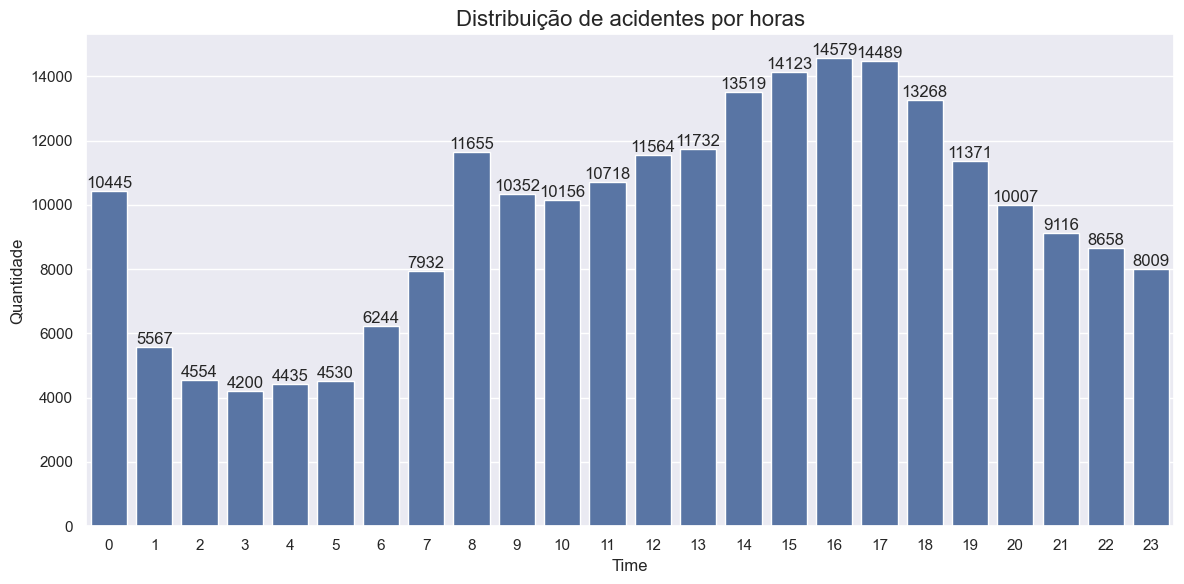

In [10]:

hours = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")

ax = sns.barplot(x=hours.dt.hour.value_counts().index, 
                 y=hours.dt.hour.value_counts().values)

# Define o tamanho do gráfico
ax.figure.set_size_inches(12, 6)

# Titulos e Legendas
plt.title("Distribuição de acidentes por horas", fontsize=16)
plt.ylabel("Quantidade")
plt.xlabel("Time")

# Plota os valores nas barras
ax.bar_label(ax.containers[0])

# Ajusta o layout
ax.figure.tight_layout()

# Exibe o gráfico
plt.show()

### Season (Estações)

In [11]:
round(df["Season"].value_counts(normalize=True)*100, 2)

Season
Spring    26.79
Winter    25.72
Summer    24.20
Fall      23.29
Name: proportion, dtype: float64

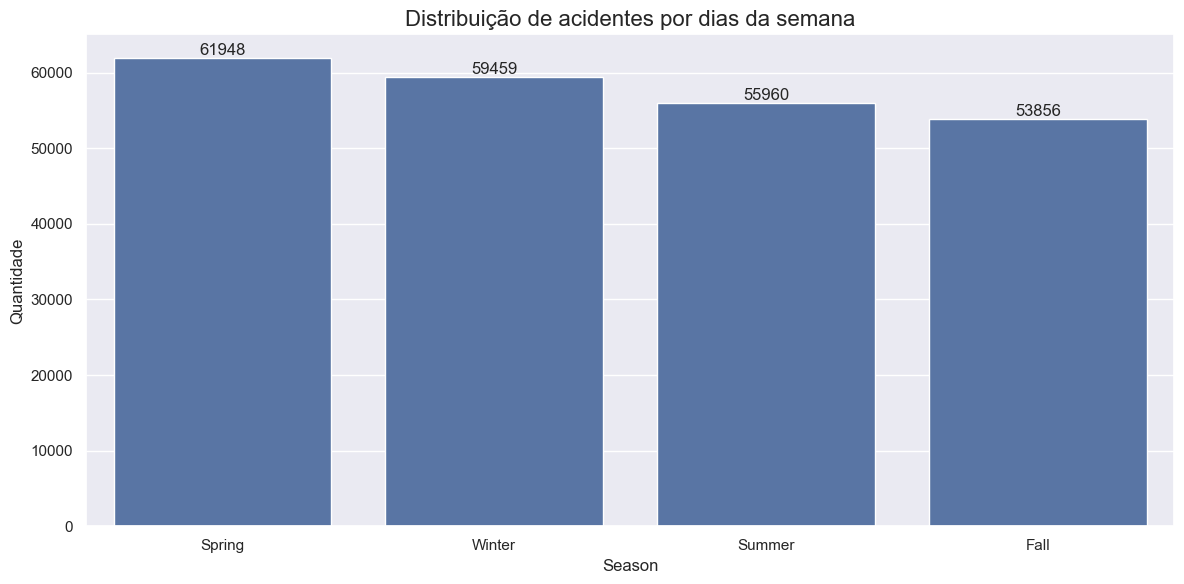

In [12]:
plot_bar_from_column(df=df, column="Season", title="Distribuição de acidentes por dias da semana")

Primavera lidera a estação com maior incidência (26.79%), possivelmente devido a aumento de chuvas (piso escorregadio e visibilidade reduzida). Maior movimentação de veículos após o inverno.

Inverno em segundo lugar (25.72%): Condições adversas como neve, geada e neblina contribuem para riscos. Frenagem irregular e menor aderência dos pneus.

Verão e Outono com menores índices: Verão (24.20%): Apesar do clima seco, fatores como viagens de férias e possível aumento de distrações (como uso de celular) mantêm os números elevados.



---

## Univariada Categórica

- Borough
- Contributing Factor
- Street Name
- Vehicle Type

### Borough (bairro)

In [13]:
df["Borough"].value_counts()

Borough
Brooklyn         76416
Queens           63751
Bronx            41254
Manhattan        38234
Staten Island    11568
Name: count, dtype: int64

In [14]:
round(df["Borough"].value_counts(normalize=True)*100, 2)

Borough
Brooklyn         33.05
Queens           27.57
Bronx            17.84
Manhattan        16.54
Staten Island     5.00
Name: proportion, dtype: float64

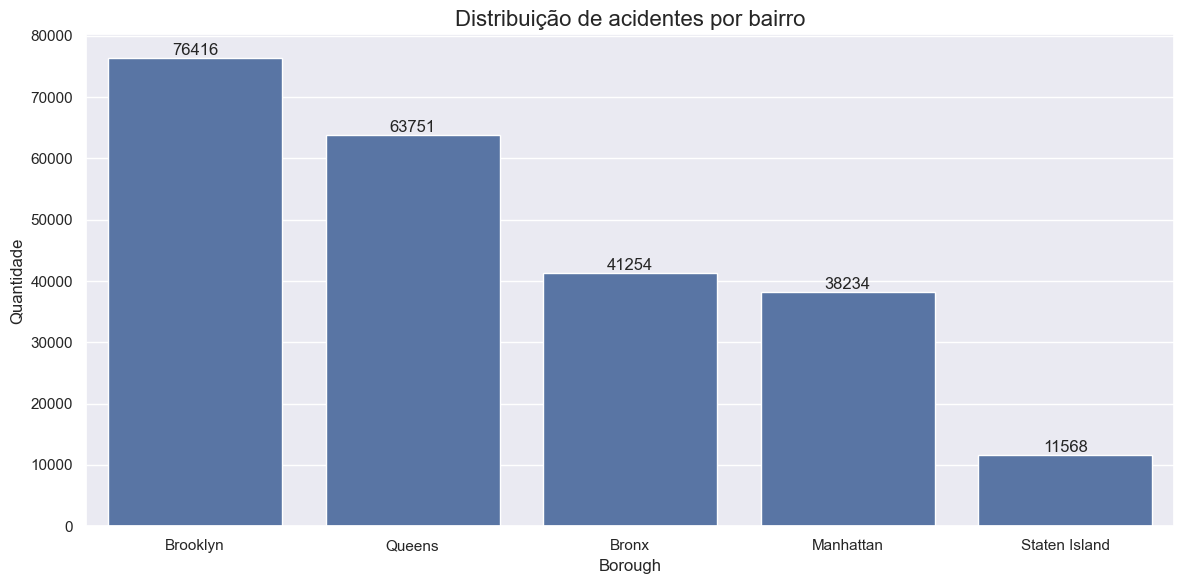

In [15]:
plot_bar_from_column(df=df, column="Borough", title="Distribuição de acidentes por bairro")

Distribuição de acidentes por bairro

O gráfico mostra que Brooklyn lidera com 33.05% acidentes , seguido por Queens 27.57% , Bronx 17.84% , Manhattan 16.54% e Staten Island com apenas 5.00% acidentes.
 
Brooklyn tem quase 7 vezes mais acidentes que Staten Island, refletindo possivelmente diferenças de população, densidade de tráfego e infraestrutura viária.

### Contributing Factor (fator contribuinte)

In [16]:
df["Contributing Factor"].value_counts()

Contributing Factor
Driver Inattention/Distraction                           57084
Unspecified                                              57035
Failure to Yield Right-of-Way                            16263
Following Too Closely                                    13917
Passing or Lane Usage Improper                           10315
Passing Too Closely                                       8991
Unsafe Speed                                              8142
Backing Unsafely                                          7388
Traffic Control Disregarded                               6549
Other Vehicular                                           6334
Turning Improperly                                        5289
Unsafe Lane Changing                                      4462
Driver Inexperience                                       4441
Alcohol Involvement                                       3866
Reaction to Uninvolved Vehicle                            2914
Pedestrian/Bicyclist/Other Pedestri

In [17]:
df["Contributing Factor"].value_counts().head(5)

Contributing Factor
Driver Inattention/Distraction    57084
Unspecified                       57035
Failure to Yield Right-of-Way     16263
Following Too Closely             13917
Passing or Lane Usage Improper    10315
Name: count, dtype: int64

In [18]:
valores_unspecified = round(df["Contributing Factor"].value_counts(normalize=True)*100, 2).head()
valores_unspecified

Contributing Factor
Driver Inattention/Distraction    24.69
Unspecified                       24.67
Failure to Yield Right-of-Way      7.03
Following Too Closely              6.02
Passing or Lane Usage Improper     4.46
Name: proportion, dtype: float64

Os valores **Não especificados** representa 24.67% da quantidade total, é um valor a se considerar 1/4 

In [19]:
valores_unknown = round(df["Contributing Factor"].value_counts(normalize=True)["Unknown"]*100, 2)
valores_unknown

np.float64(0.55)

Já os valores **Desconhecidos** representam 0.55% dos dados, praticamente não tem muita relevancia se tratando do todo

In [20]:
df["Contributing Factor"].value_counts().tail(5)

Contributing Factor
Texting                         12
Shoulders Defective/Improper    10
Cell Phone (hands-free)          9
Windshield Inadequate            7
Listening/Using Headphones       6
Name: count, dtype: int64

As causas com pesos menores são: **Enviando mensagens de texto**, **Acostamentos defeituosos / inadequados**, **Uso de celular** **(com viva-voz / mãos-livres)**, **Para-brisa inadequado**, **Ouvindo / Usando fones de ouvido**

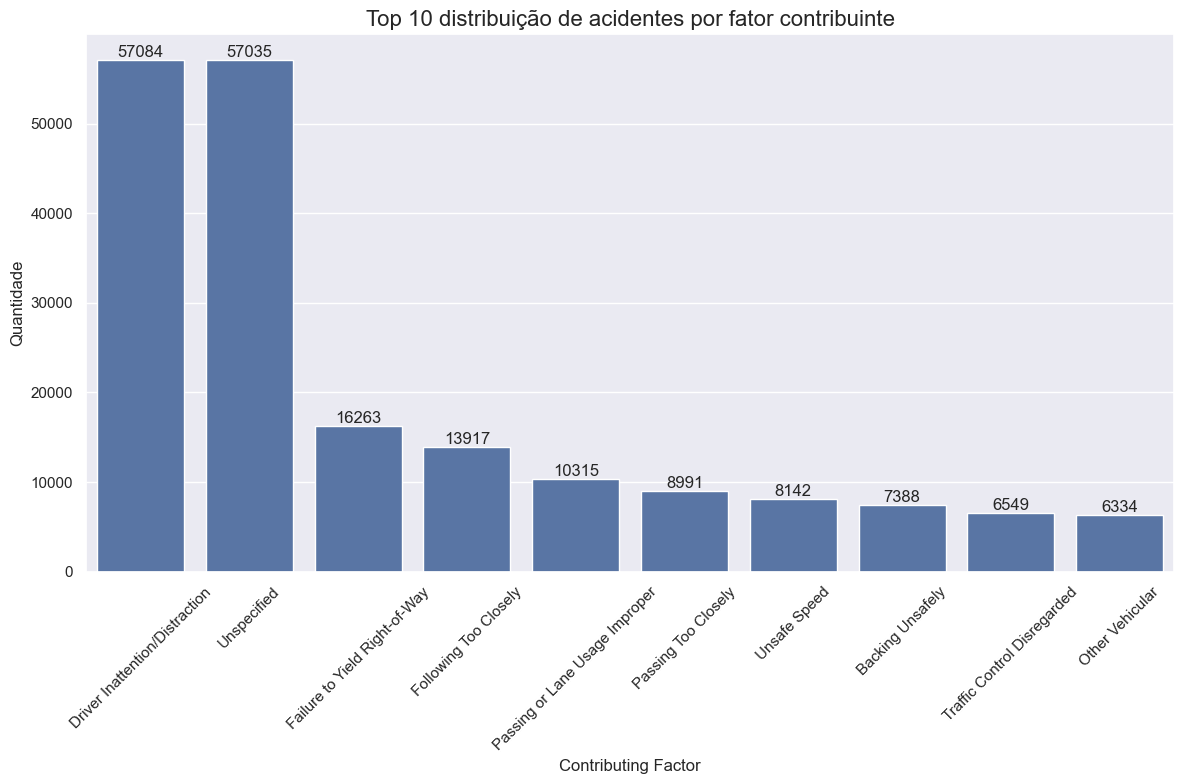

In [21]:
plot_bar_from_column(df=df, column="Contributing Factor", title="Top 10 distribuição de acidentes por fator contribuinte", top_n=10, rotation=45, figsize=(12, 8))

Fatores contribuintes para acidentes

Os dois principais fatores são praticamente empatados: **"Driver Inattention/Distraction"** 24.69% e **"Unspecified"** 24.67%. Existe uma queda significativa para o terceiro fator, **"Failure to Yield Right-of-Way"** 7.03%, seguido por **"Following Too Closely"** 6.02%.

Os dados sugerem que a desatenção ao volante é um problema crítico, enquanto o alto número de casos não especificados indica possíveis deficiências no registro de informações.

### Street Name (nome da rua)

In [22]:
df["Street Name"].value_counts().head(10)

Street Name
Belt Parkway                  3408
Broadway                      2738
Atlantic Avenue               2181
Long Island Expressway        2165
Brooklyn Queens Expressway    2039
Fdr Drive                     1899
3 Avenue                      1705
Grand Central Pkwy            1639
Cross Island Parkway          1579
Flatbush Avenue               1543
Name: count, dtype: int64

In [23]:
round(df["Street Name"].value_counts(normalize=True) * 100, 2).head()


Street Name
Belt Parkway                  1.47
Broadway                      1.18
Atlantic Avenue               0.94
Long Island Expressway        0.94
Brooklyn Queens Expressway    0.88
Name: proportion, dtype: float64

Os valores de acidente na rua **Belt Parkway** representam 1.47% dos acidentes totais.

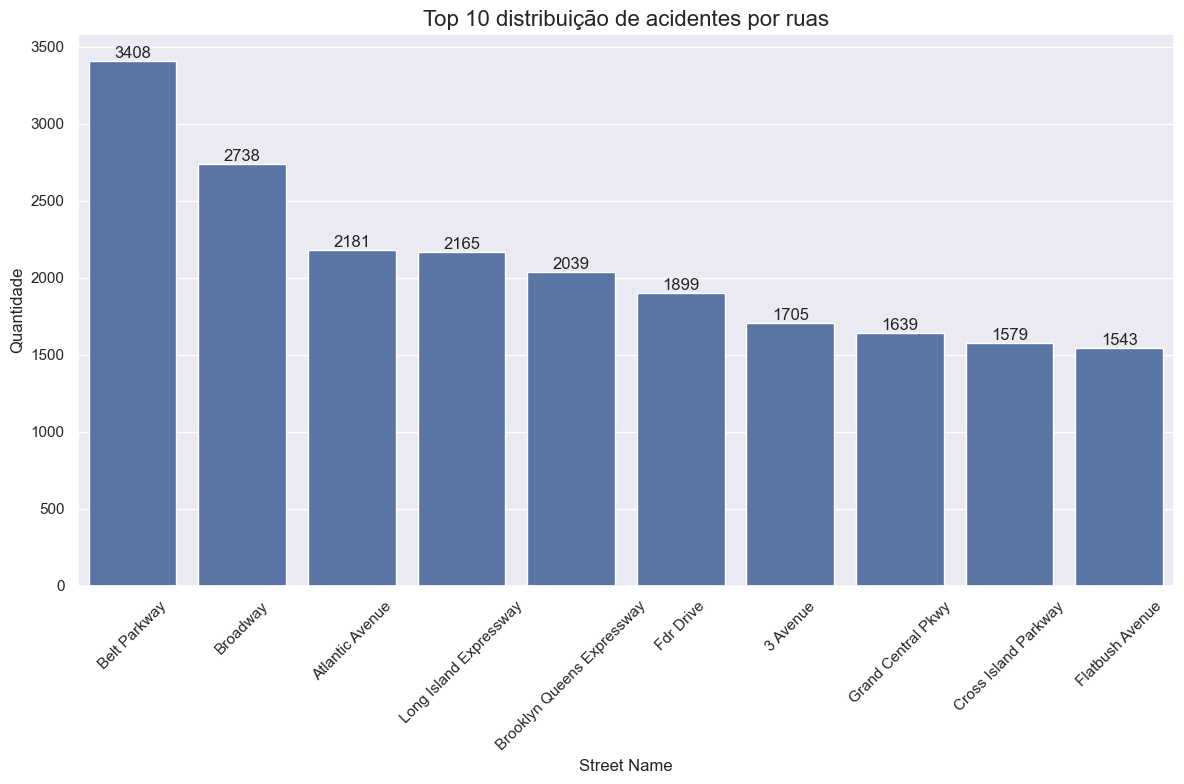

In [24]:
plot_bar_from_column(df=df, column="Street Name", title="Top 10 distribuição de acidentes por ruas", top_n=10, rotation=45, figsize=(12, 8))

Ruas com mais acidentes

**Belt Parkway** lidera com 3.408 acidentes, seguida por **Broadway** (2.738), **Atlantic Avenue** (2.181) e **Long Island Expressway** (2.165). 

As vias expressas e avenidas principais concentram os maiores números de acidentes, provavelmente devido ao maior volume de tráfego.

### Vehicle Type (tipo de veículo)

In [25]:
df["Vehicle Type"].value_counts()

Vehicle Type
Passenger Vehicle         195732
Transport                   6430
Taxi                        5829
Bicycle                     5281
Bus                         4124
Not Reported                3079
Scooter                     2074
Motorcycle                  1945
Emergency Services          1792
Delivery Vehicle            1641
Other                       1267
Construction                 875
Utility Vehicle              830
Fire Services                195
Limousine                     96
Unknown                       22
Other (Open Passenger)        11
Name: count, dtype: int64

In [26]:
round(df["Vehicle Type"].value_counts(normalize=True)*100, 2)

Vehicle Type
Passenger Vehicle         84.65
Transport                  2.78
Taxi                       2.52
Bicycle                    2.28
Bus                        1.78
Not Reported               1.33
Scooter                    0.90
Motorcycle                 0.84
Emergency Services         0.78
Delivery Vehicle           0.71
Other                      0.55
Construction               0.38
Utility Vehicle            0.36
Fire Services              0.08
Limousine                  0.04
Unknown                    0.01
Other (Open Passenger)     0.00
Name: proportion, dtype: float64

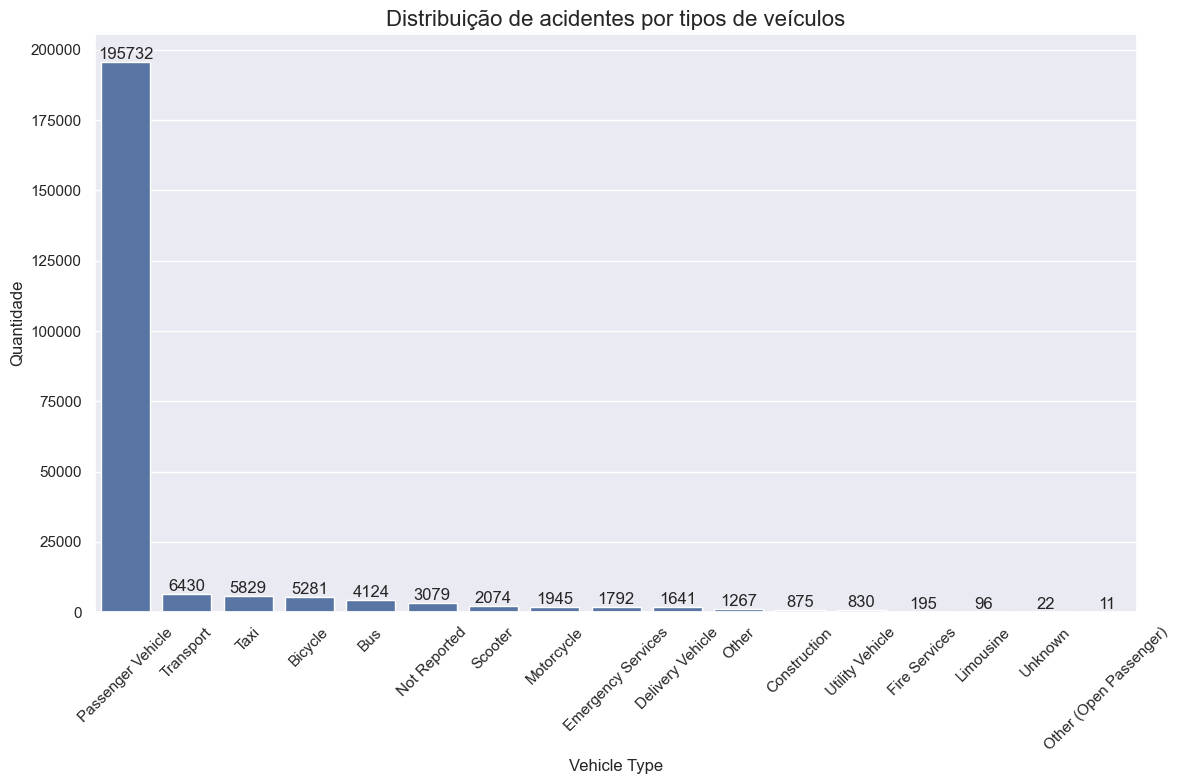

In [27]:
plot_bar_from_column(df=df, column="Vehicle Type", title="Distribuição de acidentes por tipos de veículos", rotation=45, figsize=(12, 8))

Tipos de veículos envolvidos

Há uma discrepância extraordinária entre **"Passenger Vehicle"** com 84.65% das ocorrências. Bem distante estão os veículos de **transporte** 2.78%, **táxis** 2.52% e **bicicletas** 2.28%.

Esta distribuição reflete o predomínio de carros particulares nas ruas de Nova York, sendo responsáveis pela grande maioria dos acidentes.

---

## Bivariada Temporal

- Mapa de calor: Dia da semana × Horário
- Mês × Fator Contribuinte
- Mês × Vehicle Type


In [28]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,...,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,Month,Month Name,Day of week,Day,Season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,40.68730,-73.973656,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,Fell Asleep,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,40.88270,-73.892730,Unknown,Not Reported,0,...,0,0,0,0,2021,1,January,Friday,1,Winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,40.63791,-73.978640,Unspecified,Passenger Vehicle,0,...,0,0,0,0,2021,1,January,Friday,1,Winter


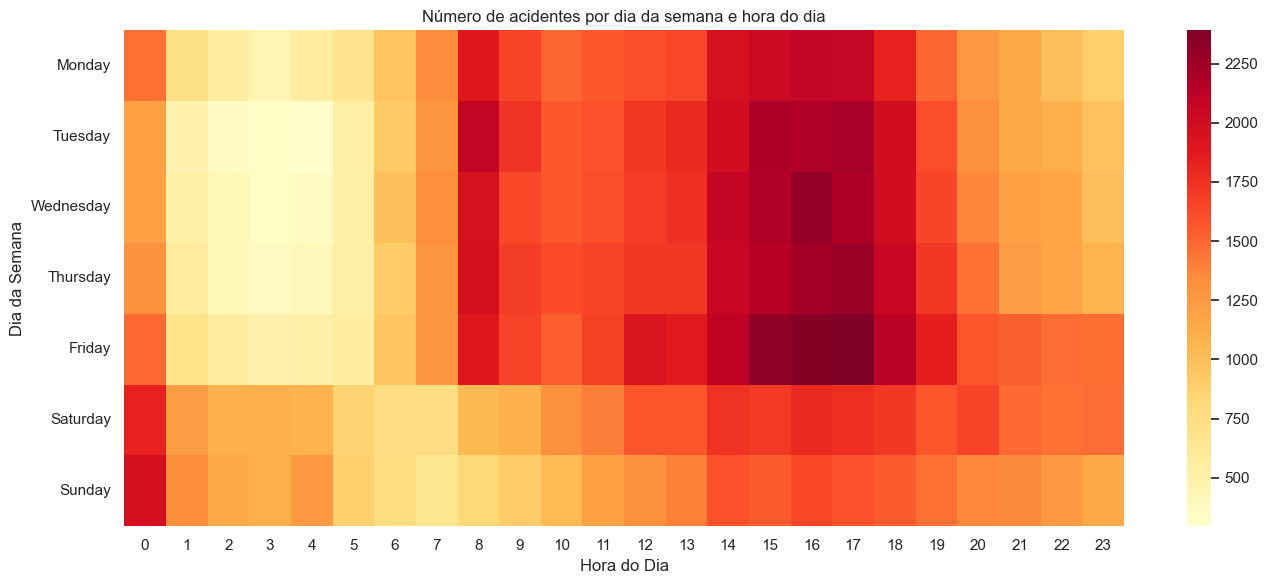

In [29]:
# Converter 'Time' apenas no momento do uso, para extrair a hora
heatmap_data = (df.groupby([df['Day of week'], pd.to_datetime(df['Time'],
                            format='%H:%M:%S',
                            errors='coerce').dt.hour]).size().unstack(fill_value=0))

# Reordenar os dias da semana 
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(dias_ordem)

# Plotar o heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Número de acidentes por dia da semana e hora do dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Dia da Semana")
plt.tight_layout()
plt.show()


Analisando o mapa de calor, podemos observar padrões claros na distribuição de acidentes por dia da semana e hora do dia:

**Principais observações:**

- **Horários de pico nos dias úteis:** Há uma concentração significativa de acidentes entre 14h-19h (período da tarde/noite) de segunda a sexta-feira, com o pico mais intenso ocorrendo por volta das 16h-17h.

- **Padrão matinal:** Outro período crítico acontece por volta das 8h-10h nos dias úteis, coincidindo com o horário de deslocamento para o trabalho.

- **Comportamento de fim de semana:** Sábados e domingos apresentam padrões distintos:
As primeiras horas da madrugada (0h-1h) mostram concentrações elevadas, provavelmente relacionadas à vida noturna
Os horários de pico são menos pronunciados durante o dia
Há uma distribuição mais homogênea ao longo do dia


- **Período noturno**: De forma geral, a quantidade de acidentes reduz drasticamente durante a madrugada (2h-5h) em todos os dias da semana, representado pelas áreas mais claras do mapa de calor.

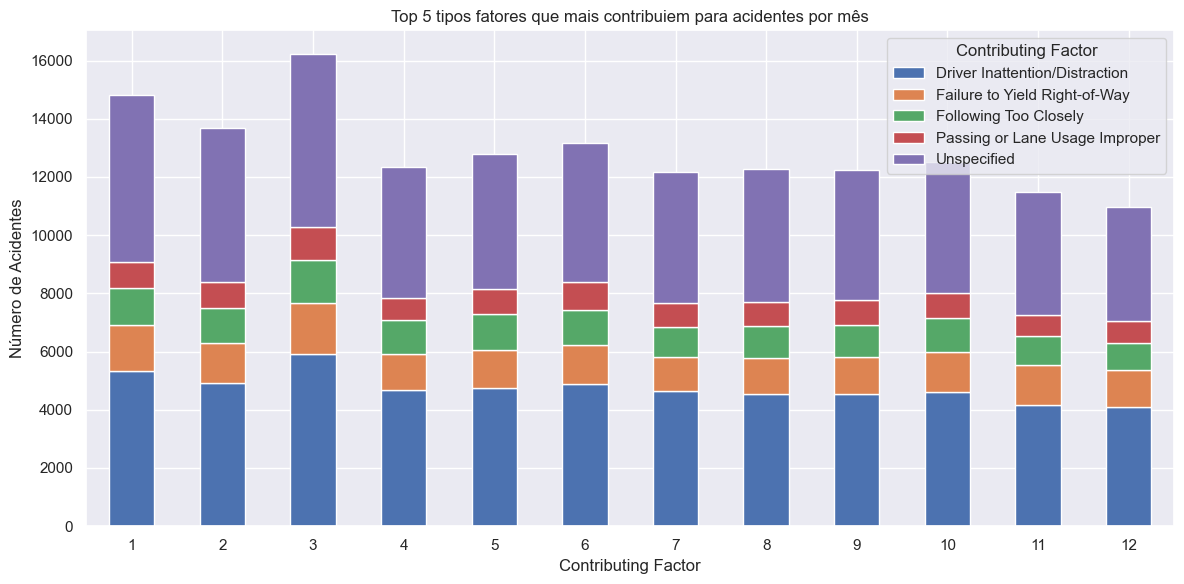

In [30]:
top_5_types = df['Contributing Factor'].value_counts().nlargest(5).index

filtered_df = df[df['Contributing Factor'].isin(top_5_types)]

month_x_type = filtered_df.groupby(['Month', 'Contributing Factor']).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
month_x_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 tipos fatores que mais contribuiem para acidentes por mês')
plt.xlabel('Contributing Factor')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


O gráfico de barras empilhadas mostra os 5 principais fatores que contribuem para acidentes, distribuídos por mês:

**Fatores predominantes:**

- **Desatenção/distração do motorista:** Consistentemente o principal fator contribuinte em todos os meses, representando 24.69% dos acidentes.

- **Não ceder direito de passagem:** Segunda causa mais comum, mantendo-se relativamente constante ao longo do ano.

- **Seguir muito próximo ao veículo da frente:** Terceira causa mais comum, também com comportamento estável durante o ano.

- **Uso impróprio de faixa/ultrapassagem:** Quarto fator mais comum.

- **Não especificado:** Completa os cinco principais fatores.

**Padrões sazonais:**

O mês 3 (março) apresenta o maior número total de acidentes, seguido pelos meses 1 (janeiro) e 2 (fevereiro).

Os meses 11 (novembro) e 12 (dezembro) mostram números relativamente menores.

A proporção entre os fatores permanece bastante consistente ao longo do ano, sem grandes variações sazonais na importância relativa de cada fator.

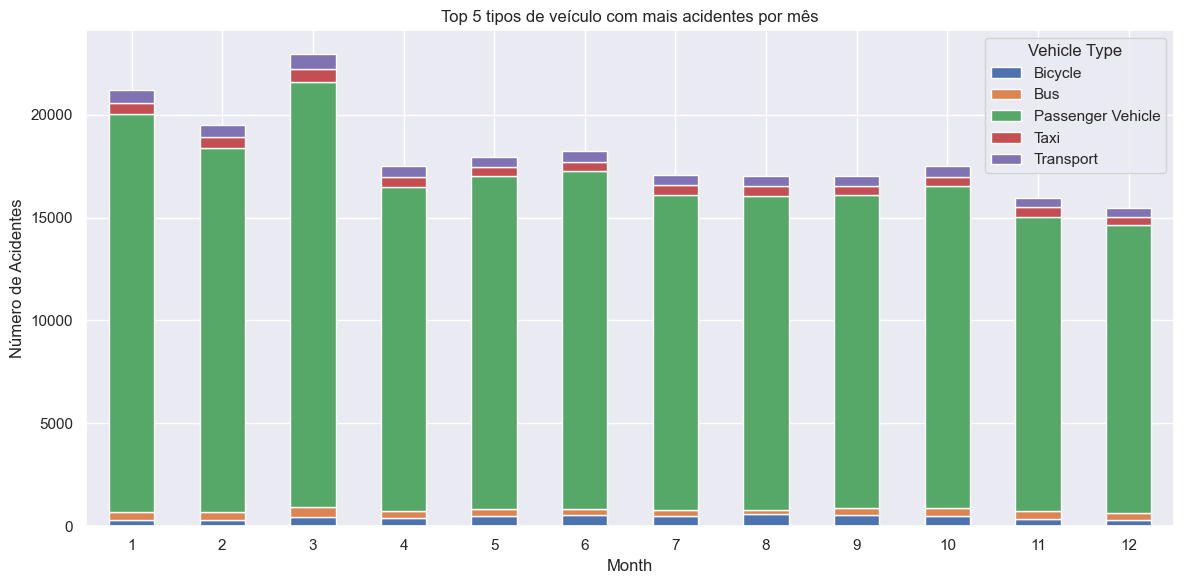

In [31]:
# Agrupar e contar o total de acidentes por tipo de veículo
top_5_types = df['Vehicle Type'].value_counts().nlargest(5).index

# Filtrar o DataFrame original para conter apenas os top 5 tipos de veículos
filtered_df = df[df['Vehicle Type'].isin(top_5_types)]

# Agrupar por Mês e Tipo de Veículo (apenas os top 5), e gerar tabela
month_x_type = filtered_df.groupby(['Month', 'Vehicle Type']).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
month_x_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 tipos de veículo com mais acidentes por mês')
plt.xlabel('Month')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


O terceiro gráfico apresenta os 5 principais tipos de veículos envolvidos em acidentes por mês:

**Distribuição por tipo:**

- **Veículos de passageiros:** Dominam amplamente as estatísticas, representando a grande maioria dos acidentes em todos os meses 84.65%.

- **Transporte:** Segunda categoria mais comum, mas com uma proporção muito menor em comparação aos veículos de passageiros.

- **Táxis, ônibus e bicicletas:** Completam o top 5, com participações relativamente pequenas nas estatísticas.

**Padrões sazonais:**

O mês 3 (março) novamente apresenta o pico de acidentes para todos os tipos de veículos.

Há uma tendência de redução nos meses finais do ano (11-12).

Não há evidência de variação sazonal significativa na proporção relativa dos tipos de veículos.

### Insights 

Com base nessas análises bivariadas, podemos extrair insights importantes:

**Otimização da fiscalização de trânsito:** Os recursos de policiamento devem ser concentrados nos horários de pico durante dias úteis (8h-10h e 14h-19h) e nas madrugadas de fim de semana.

**Campanhas educativas focadas:** As iniciativas de conscientização devem priorizar os principais fatores contribuintes, especialmente a desatenção ao volante e falhas em ceder o direito de passagem.

**Medidas preventivas sazonais:** Março aparece como um mês crítico que pode exigir intervenções específicas, como reforço na fiscalização ou campanhas intensificadas.

**Foco em veículos de passageiros:** Como são predominantes nas estatísticas, as políticas devem priorizar a segurança desse tipo de veículo, sem descuidar de campanhas específicas para motoristas profissionais.

**Adaptações na sinalização e engenharia de tráfego:** A análise do mapa de calor pode informar decisões sobre ajustes em tempos de semáforos e outras medidas de controle de tráfego nos horários mais críticos.

Distribuição de Vítimas

Proporção de acidentes com e sem feridos
Estatísticas de acidentes fatais
Comparação entre pedestres, ciclistas e motoristas afetados